#### **Importing all libraries.**

In [191]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.graph_objects as go
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error

#### **Importing dataset.**

In [192]:
df = pd.read_csv('/kaggle/input/novel-corona-virus-2019-dataset/covid_19_data.csv')

In [193]:
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


#### **Countries/Regions supported by dataset.**

In [194]:
df['Country/Region'].unique()[:12]

array(['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan',
       'Thailand', 'South Korea', 'China', 'Kiribati', 'Singapore',
       'Philippines'], dtype=object)

#### **Cases in select country.**

In [195]:
country = 'Pakistan'

In [196]:
df[df['Country/Region'] == country].head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
2515,2516,02/26/2020,NaN,Pakistan,2020-02-26T23:53:02,2.0,0.0,0.0
2621,2622,02/27/2020,NaN,Pakistan,2020-02-26T23:53:02,2.0,0.0,0.0
2730,2731,02/28/2020,NaN,Pakistan,2020-02-26T23:53:02,2.0,0.0,0.0
2843,2844,02/29/2020,NaN,Pakistan,2020-02-29T18:03:05,4.0,0.0,0.0
2967,2968,03/01/2020,NaN,Pakistan,2020-02-29T18:03:05,4.0,0.0,0.0


#### **Checking null values in each column.**

In [197]:
df[df['Country/Region'] == country].isnull().sum()

SNo                  0
ObservationDate      0
Province/State     105
Country/Region       0
Last Update          0
Confirmed            0
Deaths               0
Recovered            0
dtype: int64

#### **Fetch data of pakistan.**

In [198]:
df_country = df[df['Country/Region'] == country]

In [199]:
df_country.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
2515,2516,02/26/2020,NaN,Pakistan,2020-02-26T23:53:02,2.0,0.0,0.0
2621,2622,02/27/2020,NaN,Pakistan,2020-02-26T23:53:02,2.0,0.0,0.0
2730,2731,02/28/2020,NaN,Pakistan,2020-02-26T23:53:02,2.0,0.0,0.0
2843,2844,02/29/2020,NaN,Pakistan,2020-02-29T18:03:05,4.0,0.0,0.0
2967,2968,03/01/2020,NaN,Pakistan,2020-02-29T18:03:05,4.0,0.0,0.0


#### **Handling columns & sorting data based on dates.**

In [200]:
df_country['ObservationDate'] = pd.to_datetime(df_country['ObservationDate'])
df_country.sort_values(by='ObservationDate', inplace=True)

/tmp/ipykernel_32/3288509831.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_32/3288509831.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [201]:
df_country.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
2515,2516,2020-02-26,NaN,Pakistan,2020-02-26T23:53:02,2.0,0.0,0.0
2621,2622,2020-02-27,NaN,Pakistan,2020-02-26T23:53:02,2.0,0.0,0.0
2730,2731,2020-02-28,NaN,Pakistan,2020-02-26T23:53:02,2.0,0.0,0.0
2843,2844,2020-02-29,NaN,Pakistan,2020-02-29T18:03:05,4.0,0.0,0.0
2967,2968,2020-03-01,NaN,Pakistan,2020-02-29T18:03:05,4.0,0.0,0.0


#### **Total confirmed, deaths, recovery on each date. (all regions)**

In [202]:
df_dailycases = df_country.groupby(['ObservationDate']).agg(
    {
     'Confirmed':sum, 
     'Deaths':sum, 
     'Recovered':sum
    }
)

In [203]:
df_dailycases.head()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-02-26,2.0,0.0,0.0
2020-02-27,2.0,0.0,0.0
2020-02-28,2.0,0.0,0.0
2020-02-29,4.0,0.0,0.0
2020-03-01,4.0,0.0,0.0


In [204]:
df_dailycases.reset_index(inplace=True)

In [205]:
df_dailycases.head()

,ObservationDate,Confirmed,Deaths,Recovered
0,2020-02-26,2.0,0.0,0.0
1,2020-02-27,2.0,0.0,0.0
2,2020-02-28,2.0,0.0,0.0
3,2020-02-29,4.0,0.0,0.0
4,2020-03-01,4.0,0.0,0.0


#### **Total active cases excluding (deaths, recovered).**

In [206]:
df_dailycases['Active'] = df_dailycases['Confirmed']-df_dailycases['Deaths']-df_dailycases['Recovered']

In [207]:
df_dailycases.head()

,ObservationDate,Confirmed,Deaths,Recovered,Active
0,2020-02-26,2.0,0.0,0.0,2.0
1,2020-02-27,2.0,0.0,0.0,2.0
2,2020-02-28,2.0,0.0,0.0,2.0
3,2020-02-29,4.0,0.0,0.0,4.0
4,2020-03-01,4.0,0.0,0.0,4.0


#### **Confirmed cases over time.**

In [208]:
fig = px.bar(df_dailycases, x='ObservationDate', y='Confirmed', color='Confirmed')
fig.update_layout(
    title='Confirmed Cases in ' + country + ' (over time)',
    xaxis_title="Date",
    yaxis_title="Confirmed Cases"
)

#### **Deaths cases over time.**

In [209]:
fig = px.bar(df_dailycases, x='ObservationDate', y='Deaths', color='Deaths')
fig.update_layout(
    title='Deaths in ' + country + ' (over time)',
    xaxis_title="Date",
    yaxis_title="Deaths Cases"
)

#### **Recovery from corona over time.**

In [210]:
fig = px.bar(df_dailycases, x='ObservationDate', y='Recovered', color='Recovered')
fig.update_layout(
    title='Recovered from corona in ' + country + ' (over time)', 
    xaxis_title="Date", 
    yaxis_title="Recovered Cases"
)

#### **Active (excluding deaths, recovered) cases over time.**

In [211]:
fig = px.bar(df_dailycases, x='ObservationDate', y='Active', color='Active')
fig.update_layout(
    title='Active cases in ' + country + ' (over time)', 
    xaxis_title="Date", 
    yaxis_title="Active Cases"
)

In [212]:
df_dailycases

,ObservationDate,Confirmed,Deaths,Recovered,Active
0,2020-02-26,2.0,0.0,0.0,2.0
1,2020-02-27,2.0,0.0,0.0,2.0
2,2020-02-28,2.0,0.0,0.0,2.0
3,2020-02-29,4.0,0.0,0.0,4.0
4,2020-03-01,4.0,0.0,0.0,4.0
...,...,...,...,...,...
454,2021-05-25,908576.0,20465.0,827843.0,60268.0
455,2021-05-26,911302.0,20540.0,831744.0,59018.0
456,2021-05-27,913784.0,20607.0,834566.0,58611.0
457,2021-05-28,916239.0,20680.0,836702.0,58857.0


#### **New deaths over the time.**

In [213]:
df_dailycases['NewDeaths'] = df_dailycases['Deaths'].diff()
df_dailycases['NewDeaths'] = df_dailycases['NewDeaths'].apply(lambda val: 0.0 if val < 0 else val)
df_dailycases['NewDeaths'].loc[0] = df_dailycases['Deaths'].loc[0]

/tmp/ipykernel_32/3862311185.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [214]:
df_dailycases.loc[100:105]

,ObservationDate,Confirmed,Deaths,Recovered,Active,NewDeaths
100,2020-06-05,89249.0,1838.0,31198.0,56213.0,68.0
101,2020-06-06,93983.0,1935.0,32581.0,59467.0,97.0
102,2020-06-07,98943.0,2002.0,33465.0,63476.0,67.0
103,2020-06-08,108317.0,2172.0,35018.0,71127.0,170.0
104,2020-06-09,113702.0,2255.0,36308.0,75139.0,83.0
105,2020-06-10,113702.0,2255.0,36308.0,75139.0,0.0


In [215]:
fig = px.bar(df_dailycases, x='ObservationDate', y='NewDeaths', color='NewDeaths')
fig.update_layout(
    title='New death cases in ' + country + ' on daily basis.', 
    xaxis_title="Date",
    yaxis_title="Daily new deaths"
)

In [216]:
df_country.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
2515,2516,2020-02-26,NaN,Pakistan,2020-02-26T23:53:02,2.0,0.0,0.0
2621,2622,2020-02-27,NaN,Pakistan,2020-02-26T23:53:02,2.0,0.0,0.0
2730,2731,2020-02-28,NaN,Pakistan,2020-02-26T23:53:02,2.0,0.0,0.0
2843,2844,2020-02-29,NaN,Pakistan,2020-02-29T18:03:05,4.0,0.0,0.0
2967,2968,2020-03-01,NaN,Pakistan,2020-02-29T18:03:05,4.0,0.0,0.0


#### **Deaths & Recovered cases in each province/state.**

In [217]:
df_province = df_country.groupby('Province/State')[['Deaths', 'Recovered']].apply(
    lambda df: df.max(axis=0)
)

In [218]:
df_province.reset_index(inplace=True)

In [219]:
fig = px.pie(
    df_province, 
    values='Deaths', 
    names='Province/State', 
    title='Total deaths in each province/state.'
)
fig.show()

In [220]:
fig = px.pie(
    df_province, 
    values='Recovered', 
    names='Province/State', 
    title='Total Recoveries in each province/state.'
)
fig.show()

#### **Predicting confirmed case over the time.**

In [221]:
df_dailycases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ObservationDate  459 non-null    datetime64[ns]
 1   Confirmed        459 non-null    float64       
 2   Deaths           459 non-null    float64       
 3   Recovered        459 non-null    float64       
 4   Active           459 non-null    float64       
 5   NewDeaths        459 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 21.6 KB


In [222]:
df_dailycases.isnull().sum()

ObservationDate    0
Confirmed          0
Deaths             0
Recovered          0
Active             0
NewDeaths          0
dtype: int64

In [223]:
df_dailycases.head()

,ObservationDate,Confirmed,Deaths,Recovered,Active,NewDeaths
0,2020-02-26,2.0,0.0,0.0,2.0,0.0
1,2020-02-27,2.0,0.0,0.0,2.0,0.0
2,2020-02-28,2.0,0.0,0.0,2.0,0.0
3,2020-02-29,4.0,0.0,0.0,4.0,0.0
4,2020-03-01,4.0,0.0,0.0,4.0,0.0


In [224]:
df_dailycases.reset_index(inplace=True)

In [225]:
fig = px.line(df_dailycases, x="index", y="Confirmed", title='Confirmed cases over the time.')
fig.show()

In [226]:
df_dailycases.head()

,index,ObservationDate,Confirmed,Deaths,Recovered,Active,NewDeaths
0,0,2020-02-26,2.0,0.0,0.0,2.0,0.0
1,1,2020-02-27,2.0,0.0,0.0,2.0,0.0
2,2,2020-02-28,2.0,0.0,0.0,2.0,0.0
3,3,2020-02-29,4.0,0.0,0.0,4.0,0.0
4,4,2020-03-01,4.0,0.0,0.0,4.0,0.0


#### **Data Preparation.**

In [227]:
X = df_dailycases[['index']]
Y = df_dailycases['Confirmed']

In [228]:
train_x = X.loc[:X.shape[0]*0.95]
train_y = Y.loc[:Y.shape[0]*0.95]
test_x = X.loc[X.shape[0]*0.95:]
test_y = Y.loc[Y.shape[0]*0.95:]

In [229]:
print('Length of training records:', len(train_x))
print('Length of training labels:', len(train_y))
print('Length of testing records:', len(test_x))
print('Length of testing labels:', len(test_y))

Length of training records: 437
Length of training labels: 437
Length of testing records: 22
Length of testing labels: 22


In [230]:
ss = StandardScaler()
normalized_train_x = ss.fit_transform(train_x)
normalized_test_x = ss.fit_transform(test_x)

#### **Linear Regression model.**

In [231]:
lr = LinearRegression()
lr.fit(normalized_train_x, train_y)

LinearRegression()

In [232]:
predict_train_y = lr.predict(normalized_train_x)
predict_test_y = lr.predict(normalized_test_x)

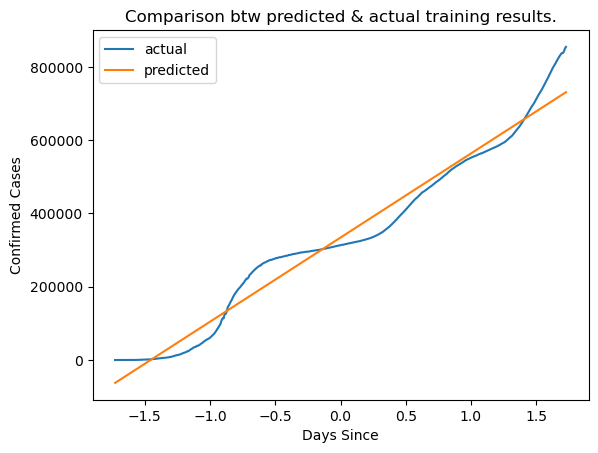

In [233]:
plt.plot(normalized_train_x, train_y, label='actual')
plt.plot(normalized_train_x, predict_train_y, label='predicted')

plt.title('Comparison btw predicted & actual training results.')
plt.xlabel('Days Since')
plt.ylabel('Confirmed Cases')

plt.legend()
plt.show()

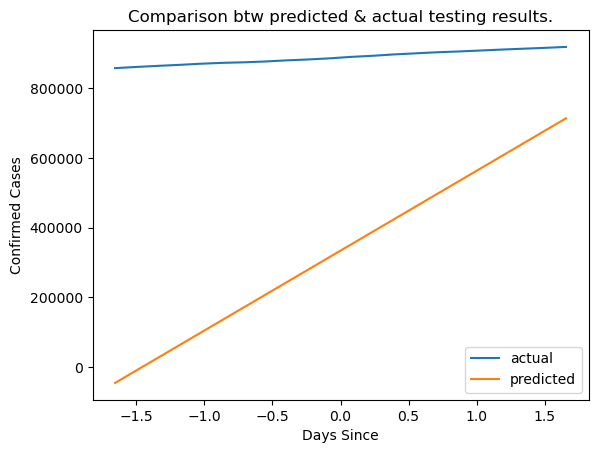

In [234]:
plt.plot(normalized_test_x, test_y, label='actual')
plt.plot(normalized_test_x, predict_test_y, label='predicted')

plt.title('Comparison btw predicted & actual testing results.')
plt.xlabel('Days Since')
plt.ylabel('Confirmed Cases')

plt.legend()
plt.show()

#### **Polynomial Regression model.**

In [235]:
pf = PolynomialFeatures(10)

In [236]:
polynomial_features_train_x = pf.fit_transform(normalized_train_x)
polynomial_features_test_x = pf.fit_transform(normalized_test_x)

In [237]:
lr = LinearRegression()
lr.fit(polynomial_features_train_x, train_y)

LinearRegression()

In [238]:
prediction_train_y = lr.predict(polynomial_features_train_x)
prediction_test_y = lr.predict(polynomial_features_test_x)

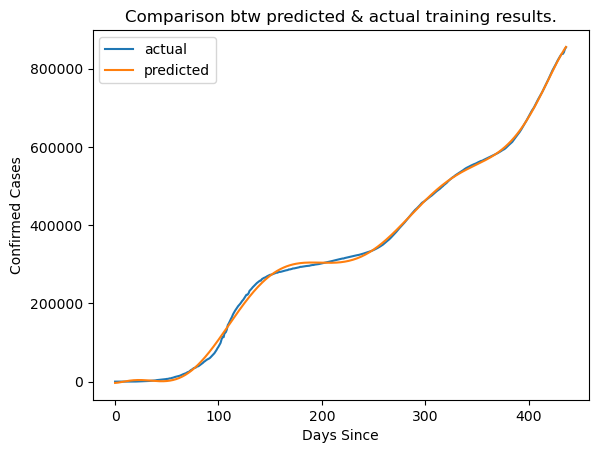

In [239]:
plt.plot(train_x, train_y, label='actual')
plt.plot(train_x, prediction_train_y, label='predicted')

plt.title('Comparison btw predicted & actual training results.')
plt.xlabel('Days Since')
plt.ylabel('Confirmed Cases')

plt.legend()
plt.show()

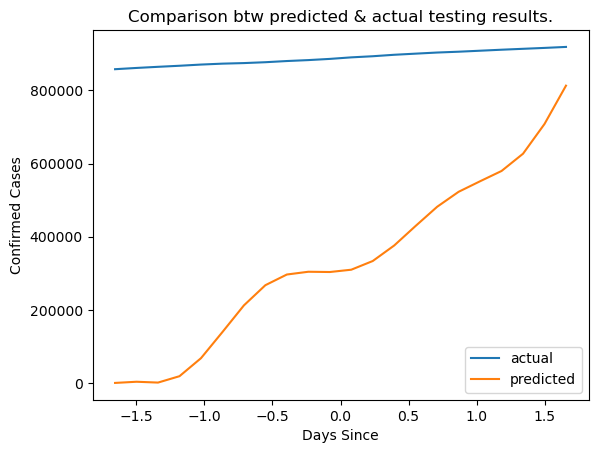

In [240]:
plt.plot(normalized_test_x, test_y, label='actual')
plt.plot(normalized_test_x, prediction_test_y, label='predicted')

plt.title('Comparison btw predicted & actual testing results.')
plt.xlabel('Days Since')
plt.ylabel('Confirmed Cases')

plt.legend()
plt.show()

In [241]:
print("MSE of polynomial regression on Training Data:", mean_squared_error(test_y, prediction_test_y))

MSE of polynomial regression on Training Data: 353963398915.6611


In [242]:
print("R-Sq of polynomial regression on Training Data:", lr.score(polynomial_features_train_x, train_y))

R-Sq of polynomial regression on Training Data: 0.9992263751836152


In [243]:
def MeasuringPerformance(normalized_train_x, train_y, normalized_test_x, test_y, degree):
    deg = []
    mse_train = []
    mse_test = []
    rs_train = []
    rs_test = []
    
    for i in range(1, degree):
        
        deg.append(i)
        
        #Generating Polynomial Features
        pf = PolynomialFeatures(i)
        polynomial_features_train_x = pf.fit_transform(normalized_train_x)
        polynomial_features_test_x = pf.fit_transform(normalized_test_x)

        #Train Regression model
        lr = LinearRegression()
        lr.fit(polynomial_features_train_x, train_y)

        #Prediction
        prediction_train_y = lr.predict(polynomial_features_train_x)
        prediction_test_y = lr.predict(polynomial_features_test_x)
        
        #Calculating MSE
        mse_train.append(mean_squared_error(train_y, prediction_train_y))
        mse_test.append(mean_squared_error(test_y, prediction_test_y))
        
        #Calculating R-Squared
        rs_train.append(lr.score(polynomial_features_train_x, train_y))
        rs_test.append(lr.score(polynomial_features_test_x, test_y))
    
    return deg, mse_train, mse_test, rs_train, rs_test

In [244]:
degree, mse_train, mse_test, rs_train, rs_test = MeasuringPerformance(normalized_train_x, train_y, normalized_test_x, test_y, 10)

In [245]:
performance = pd.DataFrame()

In [246]:
performance['Degree'] = degree
performance['MSE-Train'] = mse_train
performance['MSE-Test'] = mse_test
performance['RS-Train'] = rs_train
performance['RS-Test'] = rs_test

In [247]:
performance     #As per results suggest, model is suffering from overfitting.

,Degree,MSE-Train,MSE-Test,RS-Train,RS-Test
0,1,1.655017e+09,3.522774e+11,0.969535,-1007.645836
1,2,1.424563e+09,3.525044e+11,0.973777,-1008.295723
2,3,1.080761e+09,3.528101e+11,0.980106,-1009.171200
3,4,7.778270e+08,3.532388e+11,0.985682,-1010.398654
4,5,5.900219e+08,3.535966e+11,0.989139,-1011.422960
5,6,4.248136e+08,3.539830e+11,0.992180,-1012.529211
6,7,2.380214e+08,3.538058e+11,0.995619,-1012.021979
7,8,7.893226e+07,3.534704e+11,0.998547,-1011.061650
8,9,4.917535e+07,3.537717e+11,0.999095,-1011.924259


#### **Ridge model.**

In [248]:
polynomial_features_train_x = pf.fit_transform(normalized_train_x)
polynomial_features_test_x = pf.fit_transform(normalized_test_x)

In [249]:
r = Ridge(alpha = 0.001)

In [250]:
r.fit(polynomial_features_train_x, train_y)

Ridge(alpha=0.001)

In [251]:
prediction_train_y = r.predict(polynomial_features_train_x)
prediction_test_y = r.predict(polynomial_features_test_x)

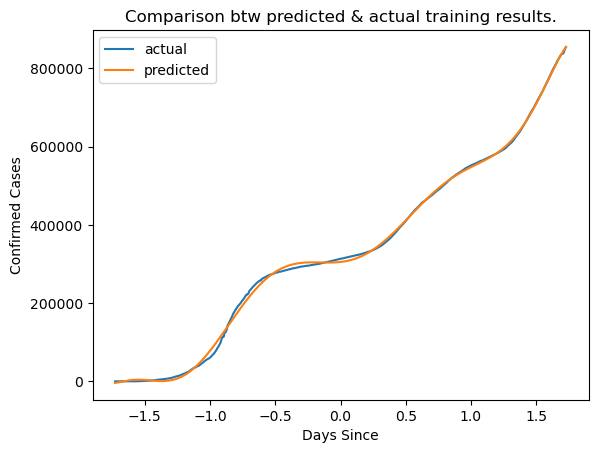

In [252]:
plt.plot(normalized_train_x, train_y, label='actual')
plt.plot(normalized_train_x, prediction_train_y, label='predicted')

plt.title('Comparison btw predicted & actual training results.')
plt.xlabel('Days Since')
plt.ylabel('Confirmed Cases')

plt.legend()
plt.show()